# Temperature Forecast Project using ML
## Problem Statement:
### Data Set Information:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### Please note that there are two target variables here: 
* Next_Tmax: Next day maximum temperature
* Next_Tmin: Next day  minimum temperature

# Import Libraries

In [1]:
# Lets Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# Lets import dataset using csv file:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 6\temperature.csv")
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Exploratory Data Analysis (EDA) and PreProcessing:


In [3]:
# lets check the shape of the dataset
df.shape

(7752, 25)

Here we can see that there are 7752 rows present in 25 columns of the dataset.

In [4]:
# lets check information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


* Here we can see that out of total 25 columns there are null value present in 18 columns. we have to fill appropriate imputation value here or we can remove these rows from the dataset.

* Even our target columns are having null values.



In [5]:
# Checking the name of all the columns present in the dataset
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

* Here we can see all the column names including our target columns Next_Tmax and Next_Tmin.

In [6]:
# lets check for presence of null values in the dataset.
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

* Here we can see exact no. of null rows column wise.
* here we are going to remove the null values from all the columns to balance the dataset.

**Null Values :**

In [7]:
# lets check unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

* Here we can see that there are 25 stations where temperature is recorded everyday and stored. and there is also nan present after 25 stations.Lets assume nan which is present in the last is data for next day.

In [8]:
# now lets fill null values in "station" column
df['station'].iloc[7750]=1.0
df['station'].iloc[7751]=2.0

In [9]:
# There is null values in the last of Date column, lets assume null values as next day prediction and will replace it with last date.
# lets fill the null values
df['Date'].iloc[7750]='31-08-2017'
df['Date'].iloc[7751]='31-08-2017'

In [10]:
# Lets give values to the null values present in the dataset using imputation method.
# lets first check skewness, if the columns are skewed that we must consider replacing values with median
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

* The limit range for skewness is +/- 0.50.
* Here we can see skewness present in LDAPS_Rhmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Solar radiation. for these columns we will replace null values with median. for all other columns where there is no skewness will replace null values with mean.

In [11]:
# First lets convert null values in columns which don't have skewness with mean values, lets find out mean values.
print("Mean of Present_Tmax = ", df["Present_Tmax"].mean())
print("Mean of Present_Tmin = ", df["Present_Tmin"].mean())
print("Mean of LDAPS_RHmin = ", df["LDAPS_RHmin"].mean())
print("Mean of LDAPS_Tmax_lapse = ", df["LDAPS_Tmax_lapse"].mean())
print("Mean of LDAPS_CC1 = ", df["LDAPS_CC1"].mean())
print("Mean of LDAPS_CC2 = ", df["LDAPS_CC2"].mean())
print("Mean of Next_Tmax = ", df["Next_Tmax"].mean())
print("Mean of Next_Tmin = ", df["Next_Tmin"].mean())

Mean of Present_Tmax =  29.76821140328037
Mean of Present_Tmin =  23.22505857849521
Mean of LDAPS_RHmin =  56.75937215069287
Mean of LDAPS_Tmax_lapse =  29.613446542813577
Mean of LDAPS_CC1 =  0.36877358559828194
Mean of LDAPS_CC2 =  0.35608043728396527
Mean of Next_Tmax =  30.274886731391593
Mean of Next_Tmin =  22.93222006472492


In [12]:
# now lets replace nan values with these mean values
mean_col=["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]
for i in mean_col:
    df[i]=df[i].replace(np.nan,df[i].mean())

* Here we have successfully replace nan values in these columns with mean of that column.

In [13]:
# Now lets replace NaN values in columns where ourliers are present with median
print("Median of LDAPS_RHmax = ",df["LDAPS_RHmax"].median())
print("Median of LDAPS_Tmin_lapse = ", df["LDAPS_Tmin_lapse"].median())
print("Median of LDAPS_WS = ",df["LDAPS_WS"].median())
print("Median of LDAPS_LH = ",df["LDAPS_LH"].median())
print("Median of LDAPS_CC3 = ",df["LDAPS_CC3"].median())
print("Median of LDAPS_CC4 = ",df["LDAPS_CC4"].median())
print("Median of LDAPS_PPT1 = ",df["LDAPS_PPT1"].median())
print("Median of LDAPS_PPT2 = ",df["LDAPS_PPT2"].median())
print("Median of LDAPS_PPT3 = ",df["LDAPS_PPT3"].median())
print("Median of LDAPS_PPT4 = ",df["LDAPS_PPT4"].median())

Median of LDAPS_RHmax =  89.79347992
Median of LDAPS_Tmin_lapse =  23.76019884
Median of LDAPS_WS =  6.547470301
Median of LDAPS_LH =  56.86548154
Median of LDAPS_CC3 =  0.262554604
Median of LDAPS_CC4 =  0.227664469
Median of LDAPS_PPT1 =  0.0
Median of LDAPS_PPT2 =  0.0
Median of LDAPS_PPT3 =  0.0
Median of LDAPS_PPT4 =  0.0


* Here we can see median values of the above columns with skewness present in them. lets replace null values in these columns with these median values. 

In [14]:
# replacing null values with median values of that column
med_col=["LDAPS_RHmax","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]
for i in med_col:
    df[i]=df[i].replace(np.nan,df[i].median())

* Here we have successfully replace nan values with median values.
* We have successfully dropped the null values from our dataset for analysis.

In [15]:
# lets recheck null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

* Here we can see that we have successfully removed null values from all the columns of the dataset

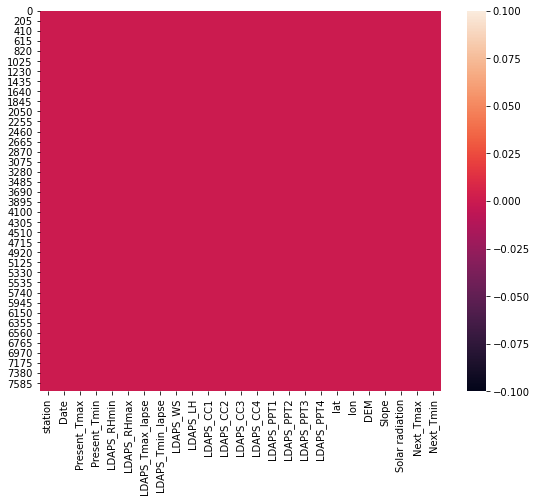

In [16]:
# Let's visualize the null values again
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull())
plt.show()

* Now we can see that there are no null values present in the dataset.



In [17]:
# Lets check the datatype of all the columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

* here we can see that all the columns present in the dataset are float datatype only one column date is object datatype.

In [18]:
# Lets check statistical description of the dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,0.356080,0.317864,0.298499,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,0.256810,0.249208,0.253211,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,0.315667,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


* There is difference in 75% percentile and max in almost all the columns which denoted to presence of outliers.

* There is difference in mean value and 50% percentile which denotes presence of skewness.

# **Feature Engineering:**

In [20]:
# Lets convert the datatype of date column from object datatype to datetime datatype
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

* Here we can see that we have successfully changed datatype of Date

In [21]:
# Now lets split Day, month and year from the date column
#Day
df["Day"]=df["Date"].dt.day

# Month
df["Month"]=df["Date"].dt.month

# Year
df["Year"]=df["Date"].dt.year

* So, we have successfully split day, month and year from date column.

In [22]:
#Lets drop the date column from the dataset to avoid duplication.
df.drop("Date", axis=1,inplace=True)

* Here we have successfully dropped the column Date.

In [23]:
# lets check the dataset head using df.head()
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


* Here we can see that we have successfully removed the column Date from the dataset.

In [24]:
# Lets check the no. of unique value in all the columns of the dataset
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Day                   21
Month                 12
Year                   5
dtype: int64

* These are the no. of Unique values columnwise.

In [25]:
# lets check the information regarding the dataset also
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


* Here we can see that all columns have same no. of values and there are no-null values present in the dataset.

In [26]:
 # Lets check the Value_counts in our Target columns
df["Next_Tmax"].value_counts()

29.300000    113
33.000000    106
31.300000    104
29.600000    101
31.200000     98
29.400000     96
30.200000     95
29.700000     95
29.200000     94
29.900000     94
30.500000     94
30.800000     94
32.500000     94
32.800000     93
33.300000     93
31.900000     93
32.700000     93
29.800000     92
30.700000     92
32.100000     92
30.000000     92
31.700000     92
32.600000     91
31.600000     91
30.600000     90
31.100000     88
30.900000     88
30.100000     87
31.400000     86
33.100000     86
31.000000     86
32.000000     85
31.500000     84
29.100000     84
28.900000     84
32.400000     83
32.300000     82
30.400000     81
32.900000     81
32.200000     81
29.000000     80
30.300000     79
28.800000     79
33.400000     78
31.800000     76
28.400000     76
28.500000     74
29.500000     74
28.600000     73
28.200000     72
28.300000     72
33.800000     71
33.200000     71
28.700000     70
27.900000     69
33.900000     67
33.600000     67
34.200000     66
34.900000     

Here are the values present in all the rows of our first target column Next_Tmax.

In [27]:
df["Next_Tmin"].value_counts()

23.50000    159
23.40000    157
24.00000    156
23.20000    150
23.80000    149
23.90000    142
23.70000    135
23.60000    133
22.10000    133
23.10000    129
22.70000    127
22.80000    125
23.30000    125
22.90000    123
24.30000    122
22.40000    120
23.00000    119
24.20000    116
24.10000    116
22.50000    113
24.80000    111
24.40000    103
22.00000    102
22.60000    102
24.50000    102
21.50000    102
22.20000    101
24.60000    100
21.80000     99
21.90000     99
24.70000     99
21.40000     95
20.70000     94
20.90000     92
21.70000     92
20.50000     91
21.30000     90
21.20000     89
24.90000     87
22.30000     85
25.30000     84
25.20000     81
25.00000     81
21.60000     77
25.70000     76
26.00000     75
25.10000     75
20.40000     73
20.80000     72
21.00000     71
25.40000     71
20.10000     69
20.30000     68
21.10000     66
25.80000     66
26.20000     65
20.60000     65
20.20000     62
26.50000     61
25.60000     58
26.80000     58
26.30000     55
26.60000

These are the Values present in each row of the column Next_Tmin

## **Visualization:**

# **Univariate Analysis:**

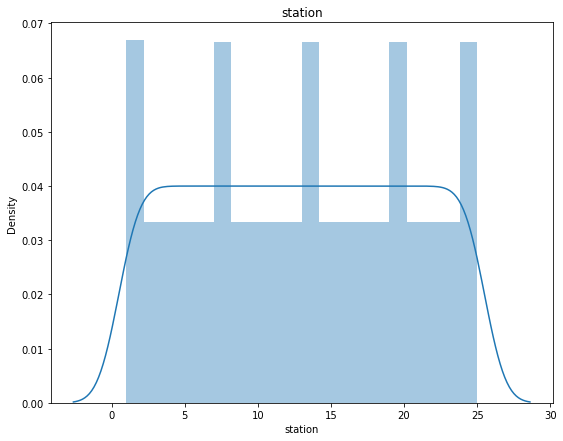

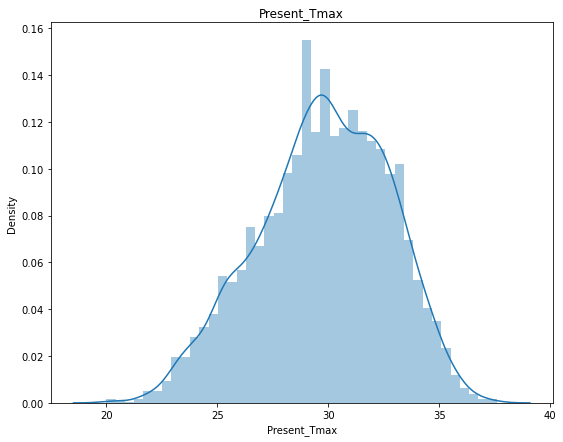

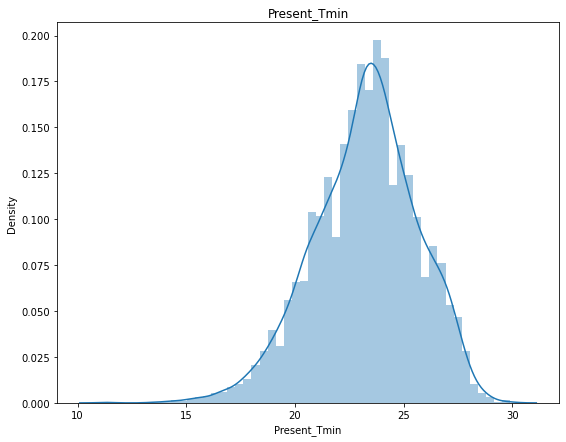

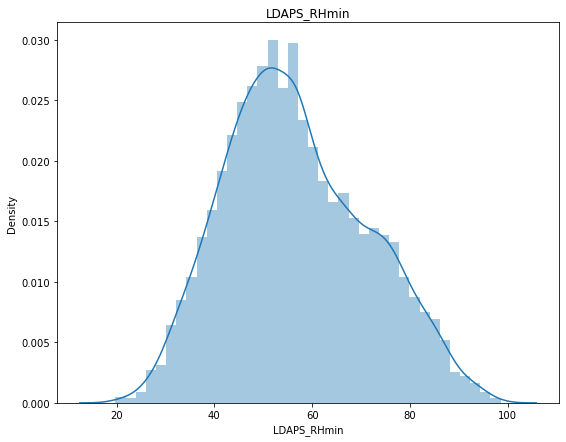

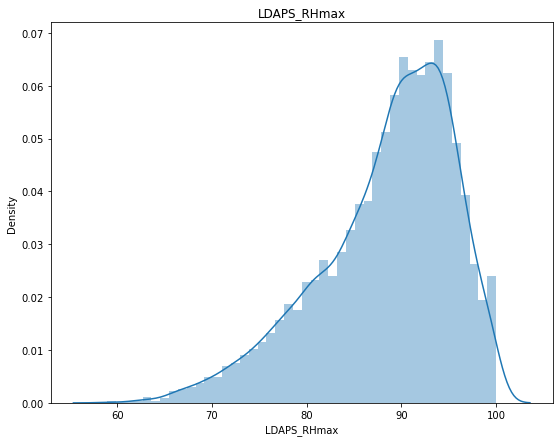

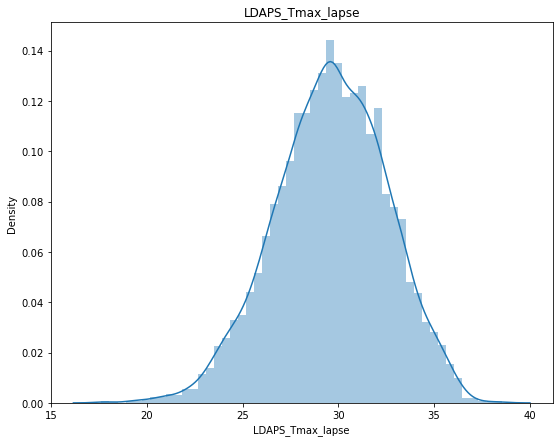

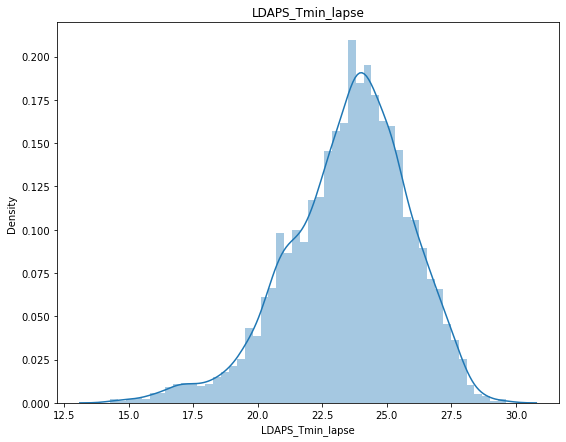

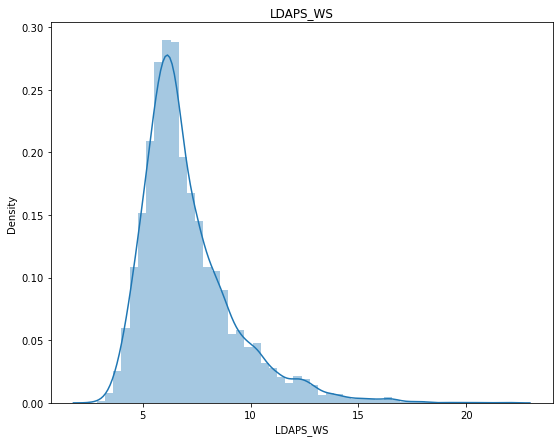

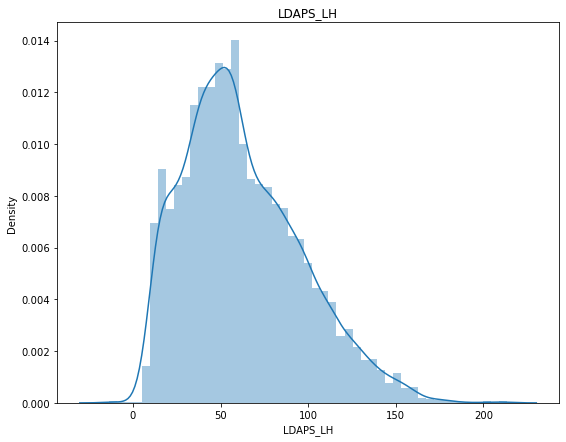

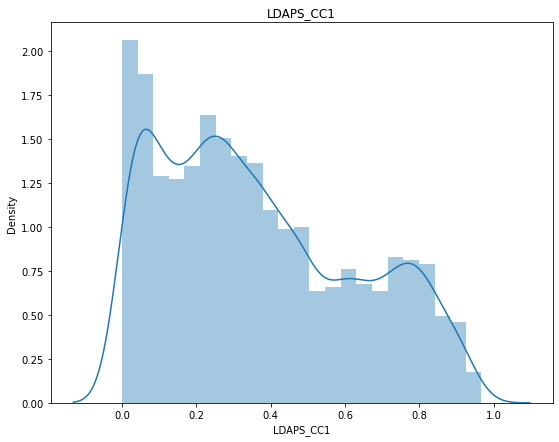

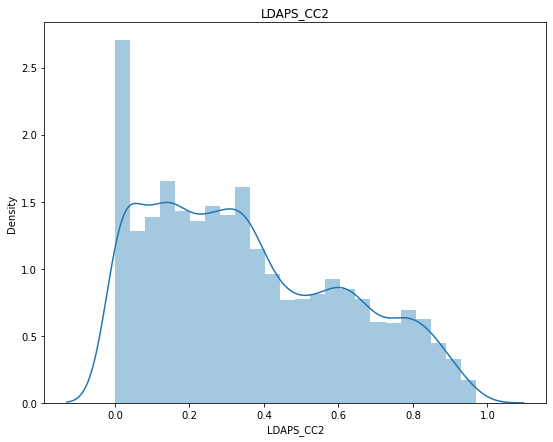

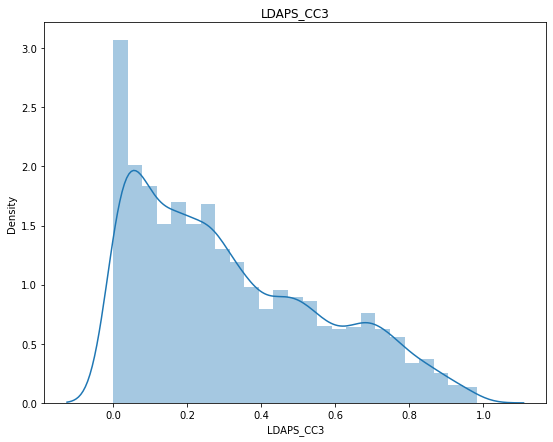

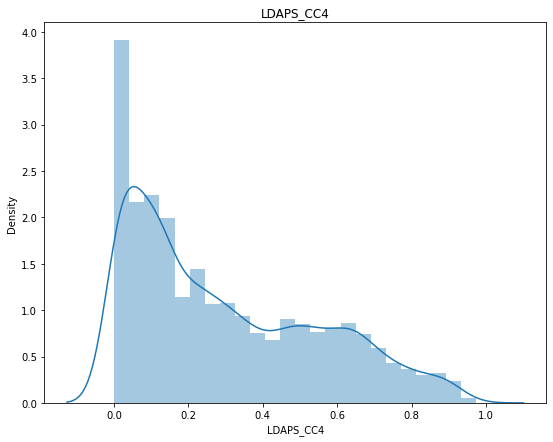

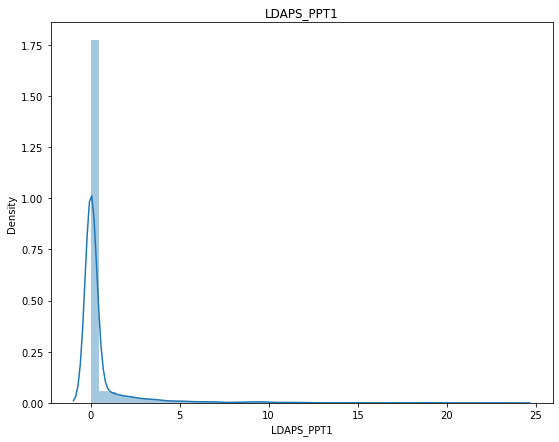

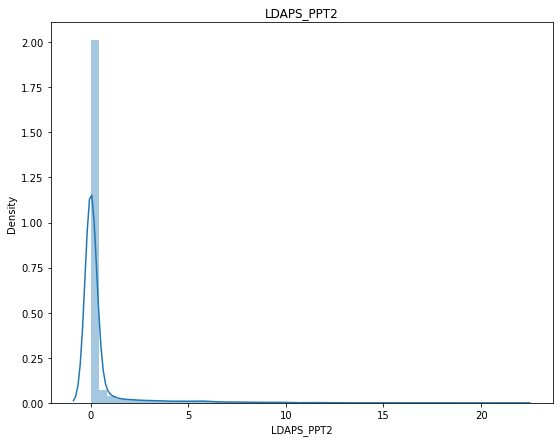

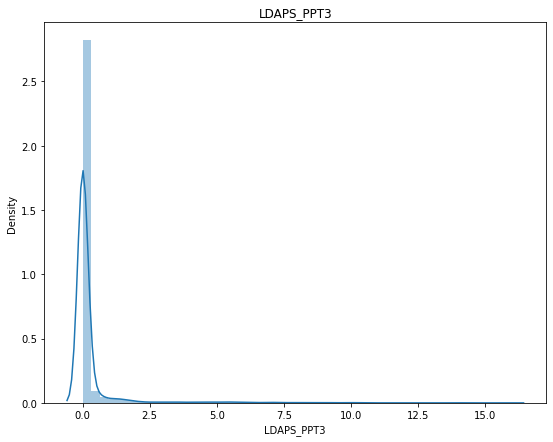

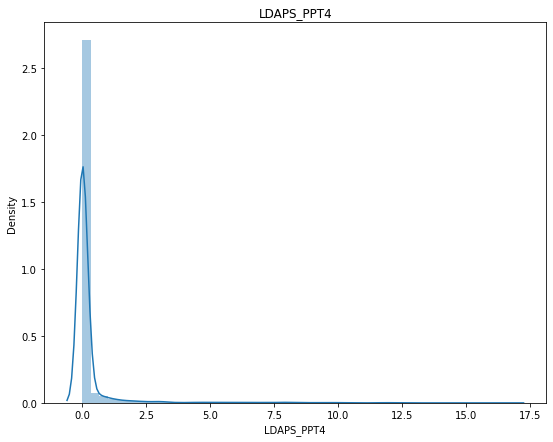

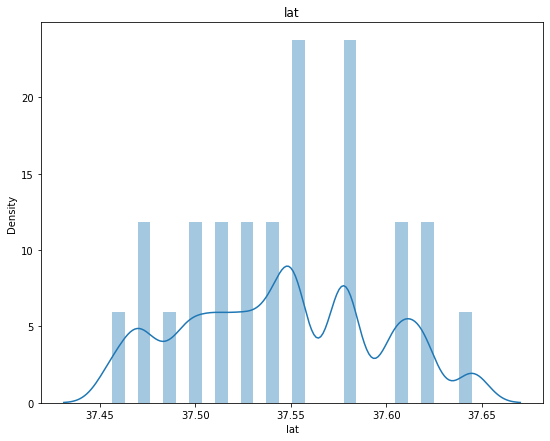

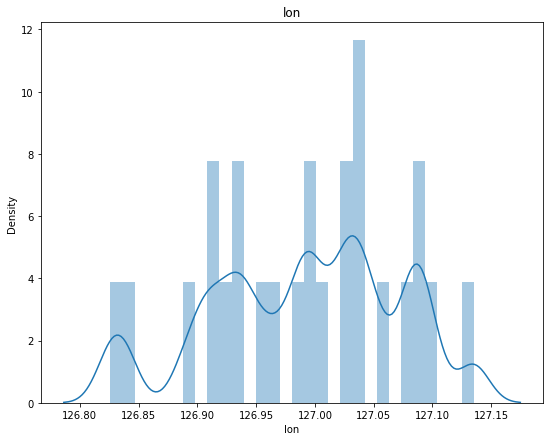

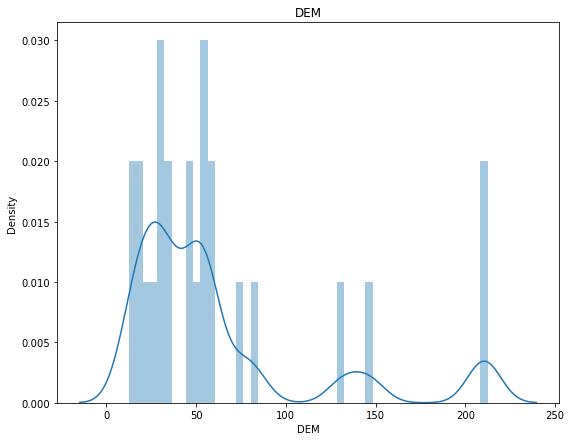

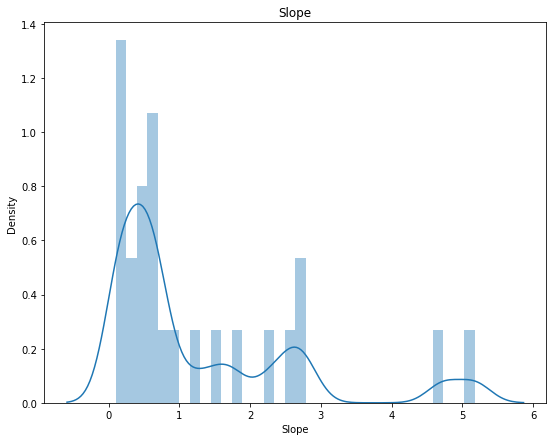

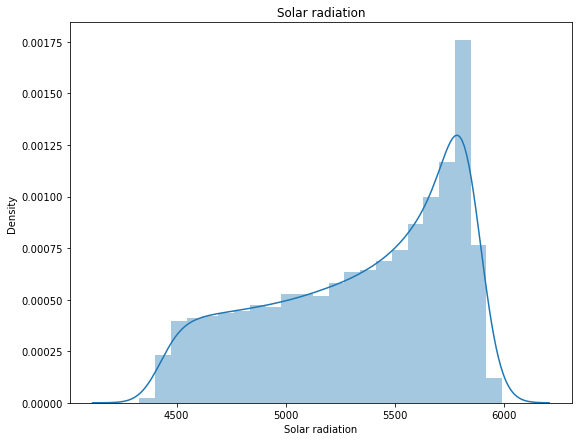

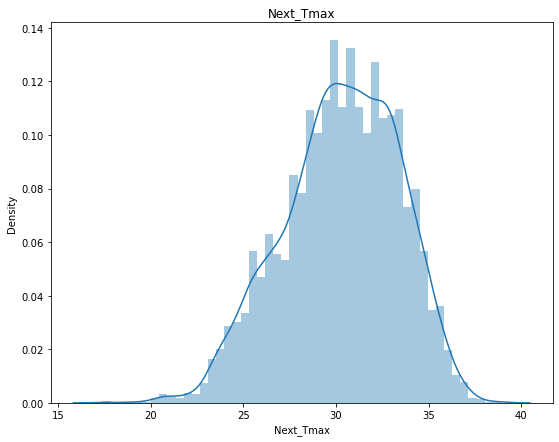

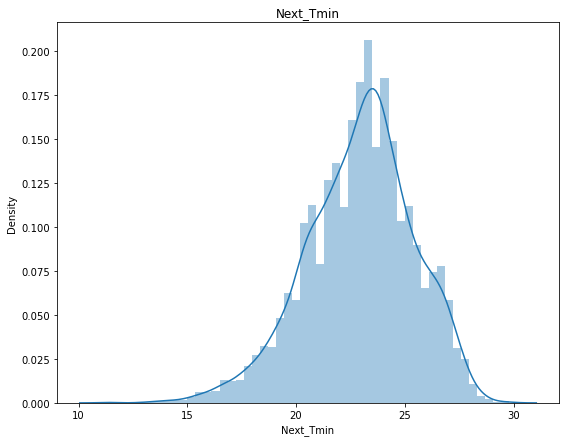

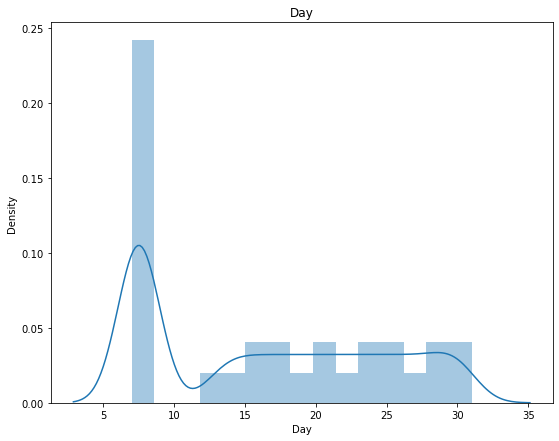

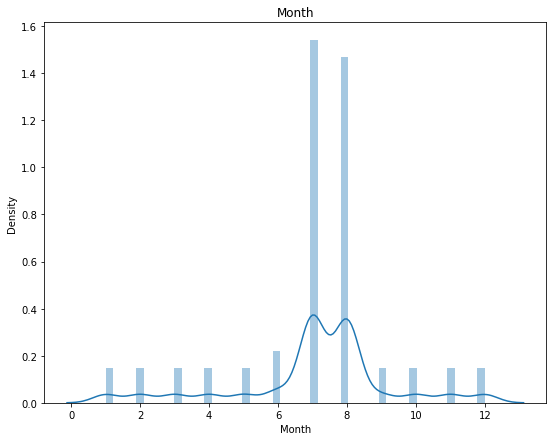

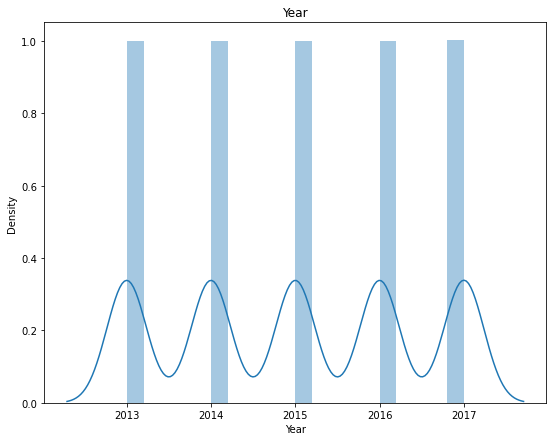

In [28]:
# Lets Visualize all the columns using histogram
for i in df.columns:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],kde=True)
    plt.title(i)
    plt.show()

* Here we can see that data seems to be normally distributed in Station Column..
* In Present Tmax, data seems to be normally distributed with almost no skewness.]=
* Present Tmin, seems to slightly skewed towards right but shape seems like bell shaped.
* LDAPS_RHmin, seems slightly towards left, it means mean is more than median.
* LDAPS_RHmax, is right skewed means, median is more than mean.
* LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 all are also left skewed.
* LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, all these are skewed towards left too.
* LAT and LON seems to be normally distributed but data in these 2 columns is spreaded means standard deviation is high.
* DEM and SLope both are skewed towards the left.
* Solar Radiation is Skewed Towards the Right.
* OUR TARGET COLUMNS NEXT_Tmax and NEXT_Tmin seems to be normally distributed.

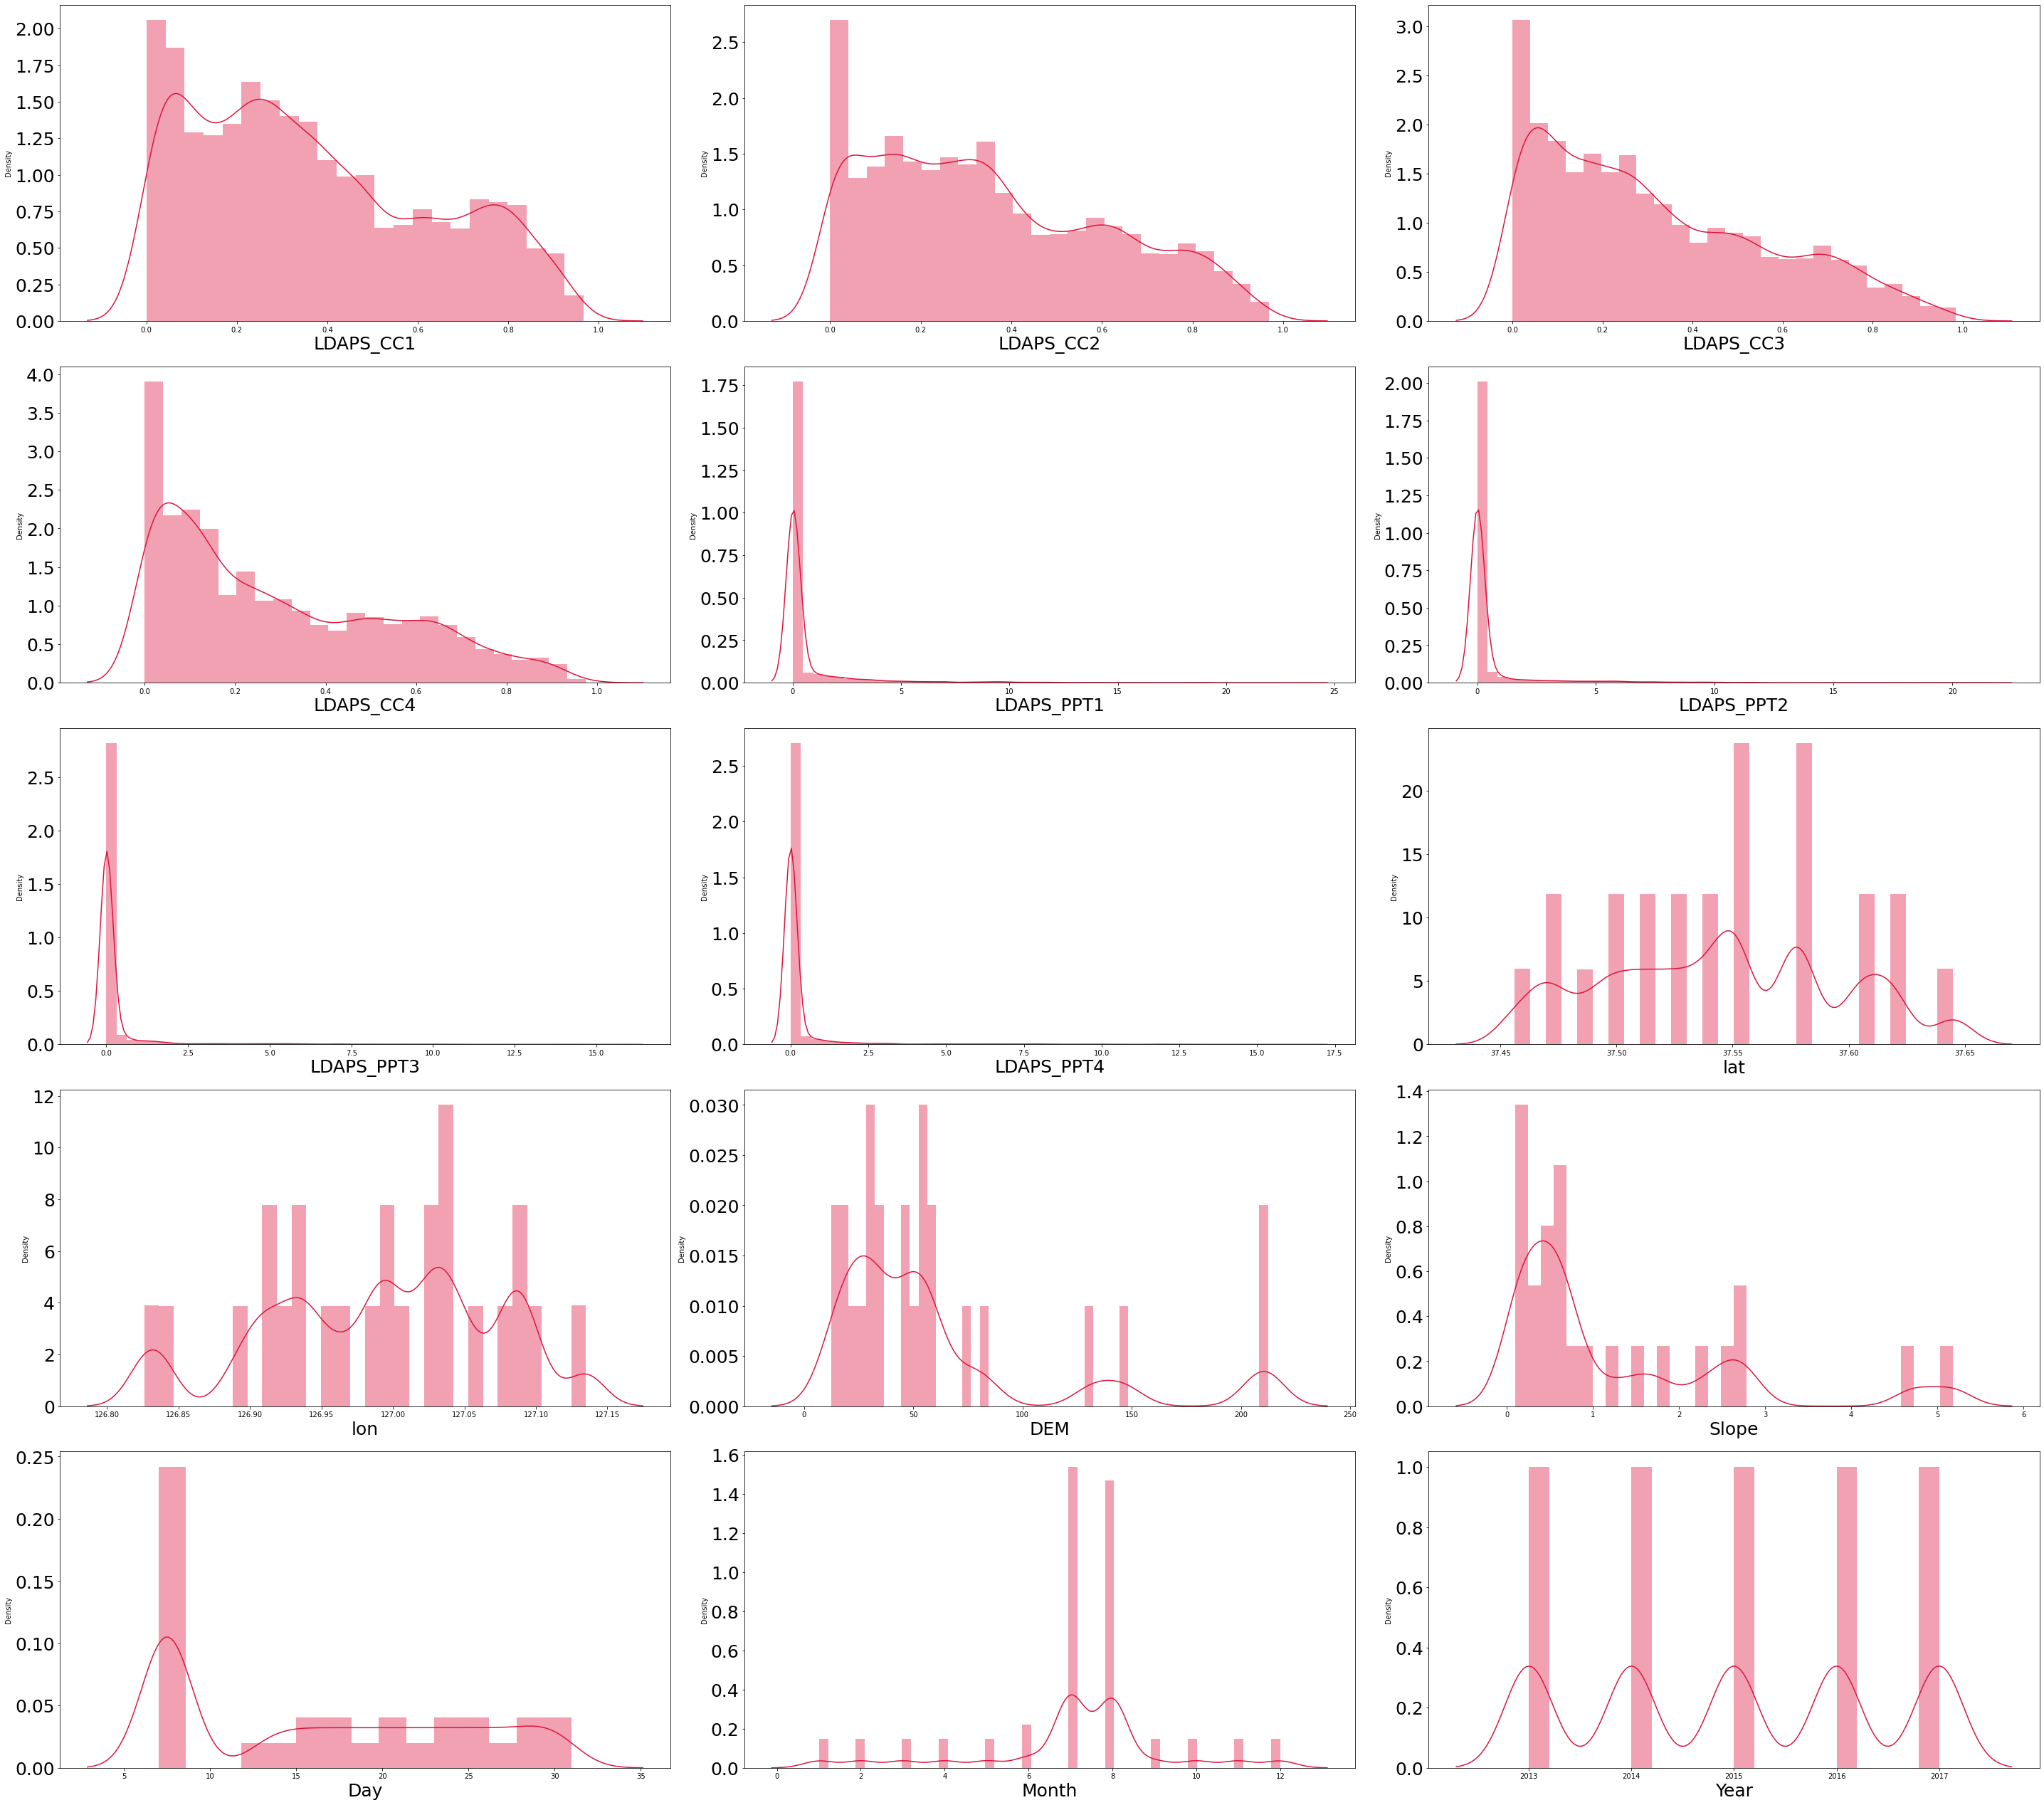

In [29]:
# Let's check how the data has been distributed in remaining columns using distplot
plt.figure(figsize=(40,70),facecolor='white')
plotnumber=1
for column in df.columns.drop(["Next_Tmax","Next_Tmin","Solar radiation"]):
    if plotnumber>=10:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
    plotnumber+=1
plt.tight_layout()


# **Bivariate Analysis:**

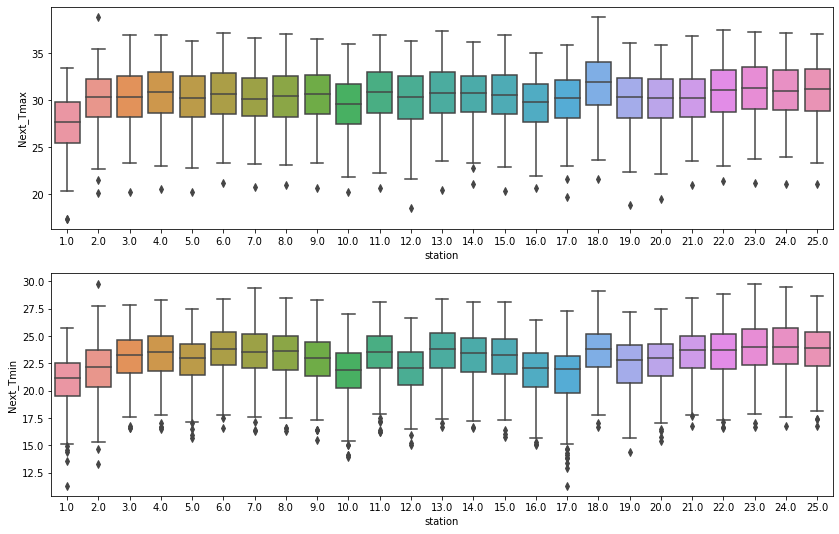

In [30]:
# lets visualize the relation between station and the target columns
plt.figure(figsize=(14,9))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df)
plt.subplot(2,1,2)
sns.boxplot(df['station'],df['Next_Tmin'],data=df)
plt.show()

* Here we can see that maximum temperature is noticed in station 18 and minimum temperature is collected in station 1 in both the target columns.

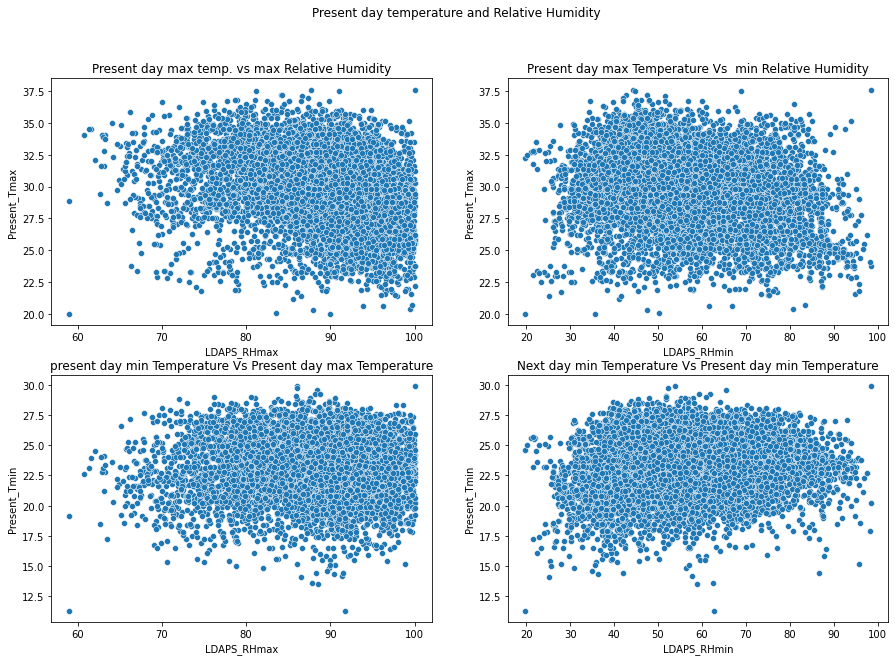

In [31]:
# Lets compare present day temperature and Relative Humidity
plt.figure(figsize=(15,10))
plt.suptitle("Present day temperature and Relative Humidity")

plt.subplot(2,2,1)
plt.title("Present day max temp. vs max Relative Humidity")
sns.scatterplot(x="LDAPS_RHmax",y="Present_Tmax", data=df)

plt.subplot(2,2,2)
plt.title('Present day max Temperature Vs  min Relative Humidity')
sns.scatterplot(x='LDAPS_RHmin',y='Present_Tmax',data=df)

plt.subplot(2,2,3)
plt.title('present day min Temperature Vs Present day max Temperature')
sns.scatterplot(x='LDAPS_RHmax',y='Present_Tmin',data=df)

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.scatterplot(x='LDAPS_RHmin',y='Present_Tmin',data=df)
plt.show()

* Here visualizing correlation between present day temperature and Relative Humidity.
* Here we can observe that Humidity is relatively low at lower temperatures(Present_Tmin) and its at its peak from temperature in range 20 to 27.5.
* Here we can also observe when compairing relative humidity with temperature max. that when temperature reaches in range 30 ro 32.5 humidity reaches its peak.

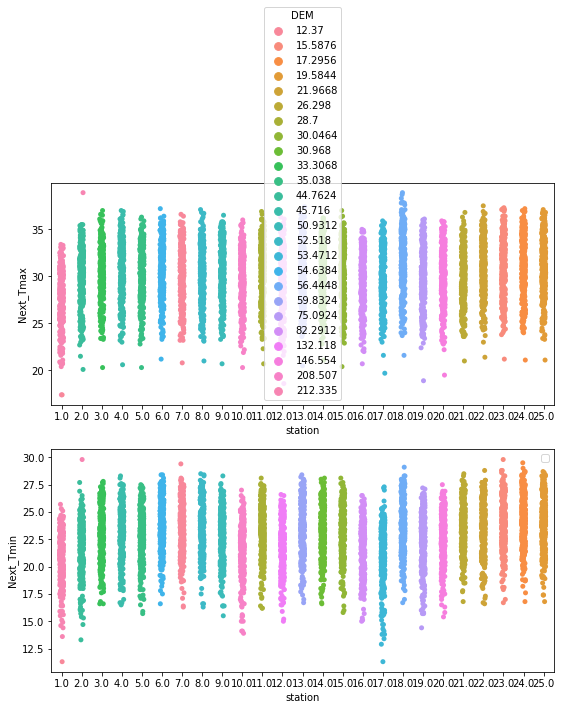

In [32]:
# Lets visualize the relation between station and the target variables on the basis of longitude
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
sns.stripplot(df['station'],df["Next_Tmax"],data=df,hue=df["DEM"])
plt.subplot(2,1,2)
sns.stripplot(df['station'],df["Next_Tmin"],data=df,hue=df["DEM"])
plt.legend("")
plt.show()

* Here we can see that the highest Tmax is noted at the station 18 which have the elevation 56.4448 and it is not lowest elevation. This indicates that elevation alone does not decide the temperature.


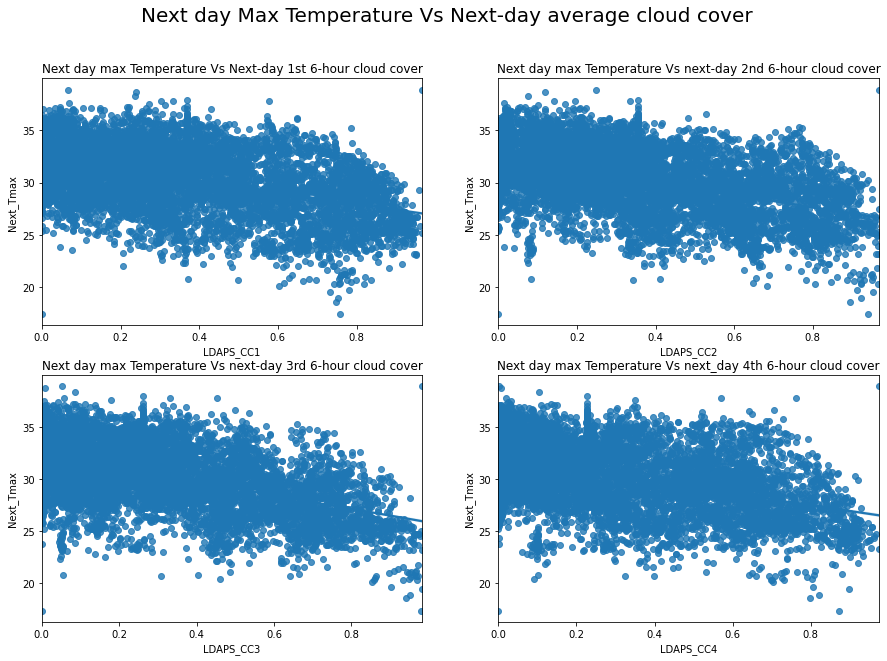

In [33]:
# Lets compare Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(15,10))
plt.suptitle('Next day Max Temperature Vs Next-day average cloud cover',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover')
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover')
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover')
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover')
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df)
plt.show()

* Here we can clearly observe that as cloud cover increases the Next_Tmax or temperature decereases

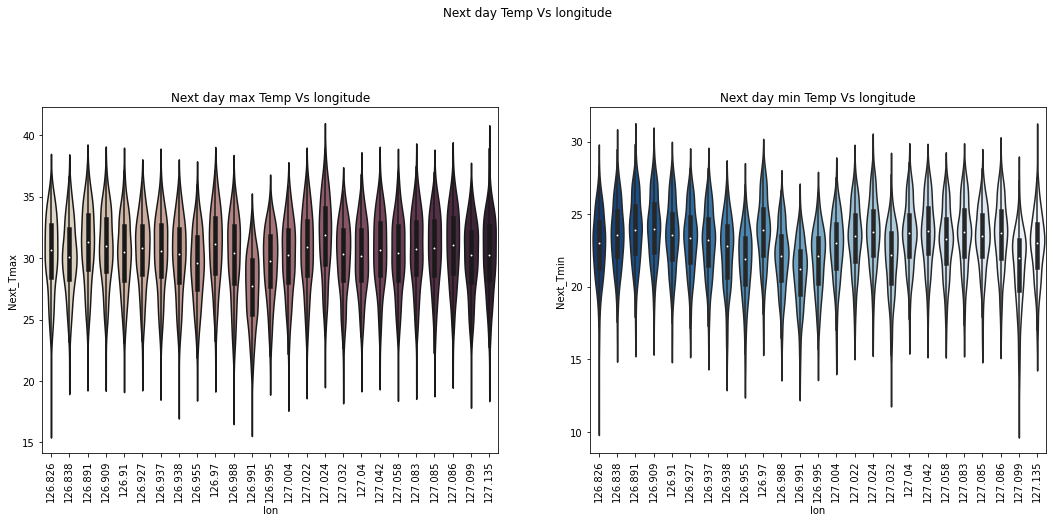

In [34]:
# Lets compare Next day temperature and longitude

plt.figure(figsize=(18,14))
plt.suptitle('Next day Temp Vs longitude')

plt.subplot(2,2,1)
plt.title('Next day max Temp Vs longitude')
sns.violinplot(x='lon',y='Next_Tmax',data=df,palette="ch:.28")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Next day min Temp Vs longitude')
sns.violinplot(x='lon',y='Next_Tmin',data=df,palette="Blues_r")
plt.xticks(rotation=90)
plt.show()

* Here it seems that Longitude is not affecting next day temperature much

# **MultiVariate Analysis:**

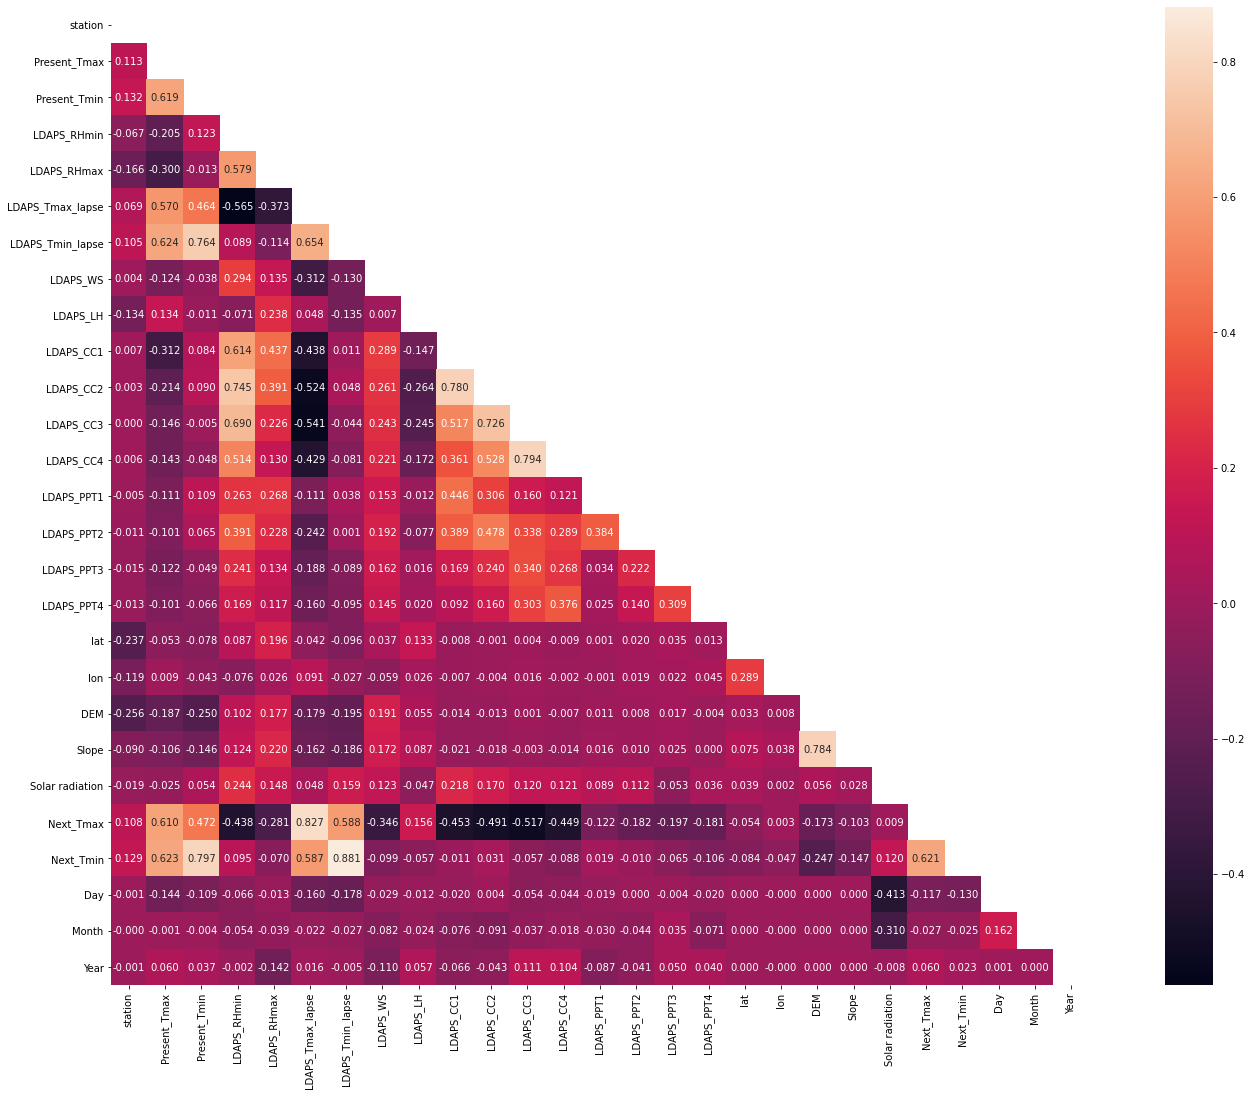

In [35]:
# Lets visualize the Correlation of all the feature column with Target Next_Tmax and Next_Tmin
tri=np.triu(df.corr())
plt.figure(figsize=(27,18))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* Here we ca see that our Target Column Next_Tmax shares very good relation with columns Present_Tmax,
Present_Tmin, Shares strong negative correlation with columns LDAPS_RHmin, LDAPS_cc1,cc2,cc3,cc4.

* Our other Target column Next_Tmin, share strong relation with Present_Tmax, Present_Tmin, Next_Tmax.

# **OutLiers:**

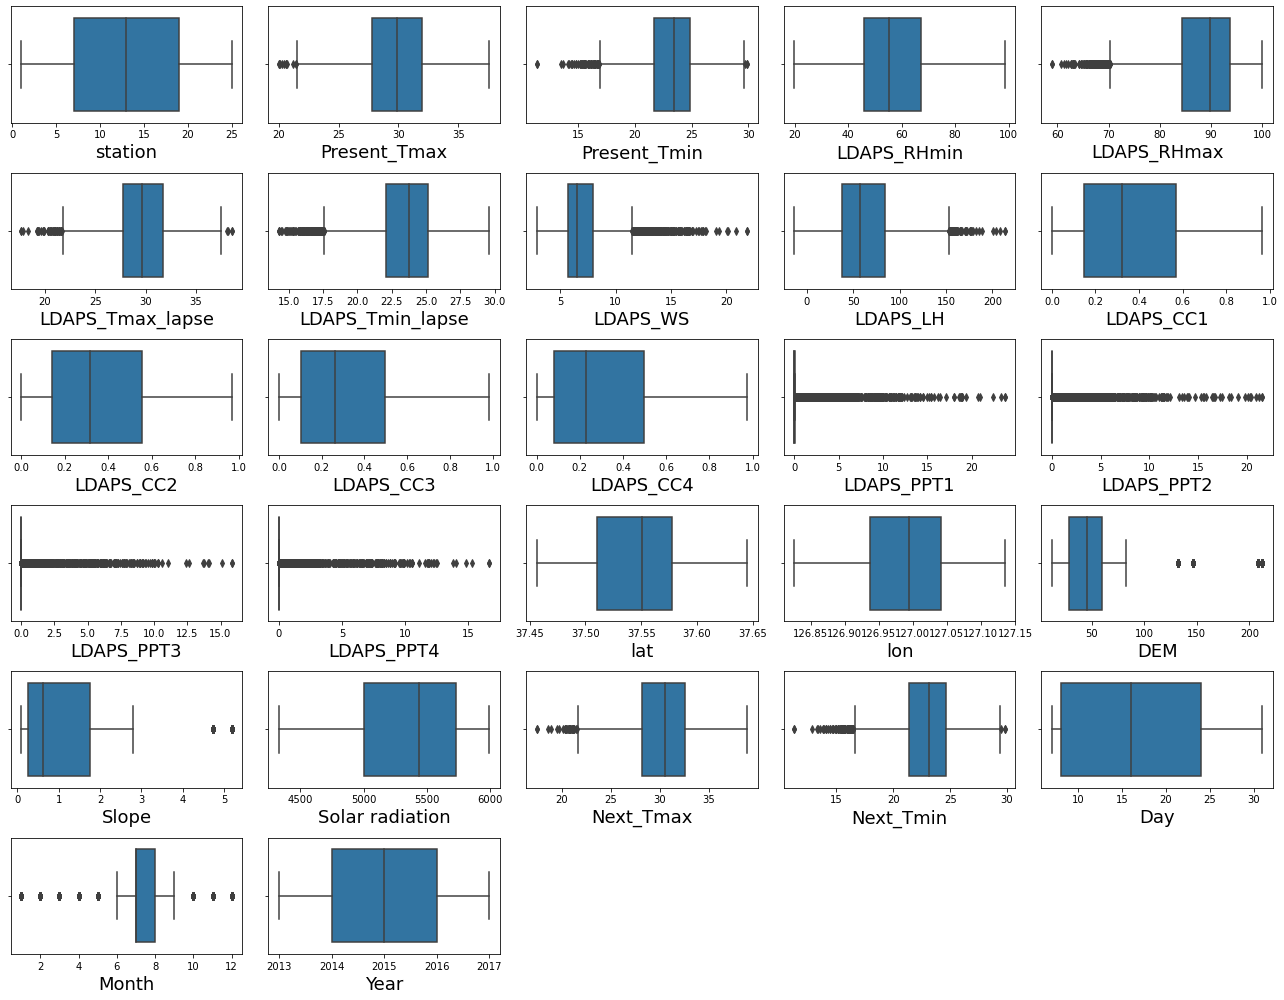

In [36]:
# Lets check for the presence of outliers in numerical columns using boxplot

plt.figure(figsize=(18,14))
num=1
for column in df.columns:
    if num<=27:
        ax=plt.subplot(6,5,num)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=18)
        num+=1
plt.tight_layout()

* Here we can observe Outliers in many columns:
Present_Tmax, Present_Tmin, LDAPS_RHmax,LDAPS_Tmax_Lapse,LDAPS_Tmin_Lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, and our target columns, month.

In [37]:
# lets remove outliers using ZScore Method
# Lets assign columns having outliers present in 1 list
a = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]

# Lets execute zscore to remove outliers
# importing required library
from scipy.stats import zscore

z=np.abs(zscore(a))
z

array([[0.36132577, 0.75952931, 0.38108836, ..., 2.77224286, 1.11500407,
        0.48297247],
       [0.72108401, 0.6762959 , 0.30961004, ..., 0.31515742, 0.54215762,
        0.48297247],
       [0.61960809, 0.03118815, 0.61678354, ..., 0.52621832, 0.7231326 ,
        0.48297247],
       ...,
       [2.22171758, 2.42419767, 1.55696714, ..., 0.77904331, 0.71933797,
        0.41069088],
       [3.30412736, 4.9628169 , 4.11458611, ..., 0.91196325, 0.8454552 ,
        0.41069088],
       [2.64912642, 2.77789093, 1.62218605, ..., 2.77224286, 2.86143459,
        0.41069088]])

* Here we have successfully removed the skewness from the dataset.

In [38]:
# Lets create new dataframe
df1=df[(z<3).all(axis=1)]
df1.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.0,0.0,0.0,0.0,37.5237,126.970,19.5844,0.2713,4451.345215,27.8,17.4,30,8,2017


In [39]:
# Lets check the shape of new dataframe
df1.shape

(6907, 27)

In [40]:
# Lets check the data loss using zscore
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

10.900412796697626

* Here using zscore we are losing 10.9 % data. lets not remove so much data as it might affect our model working.

##  Next_Tmax:

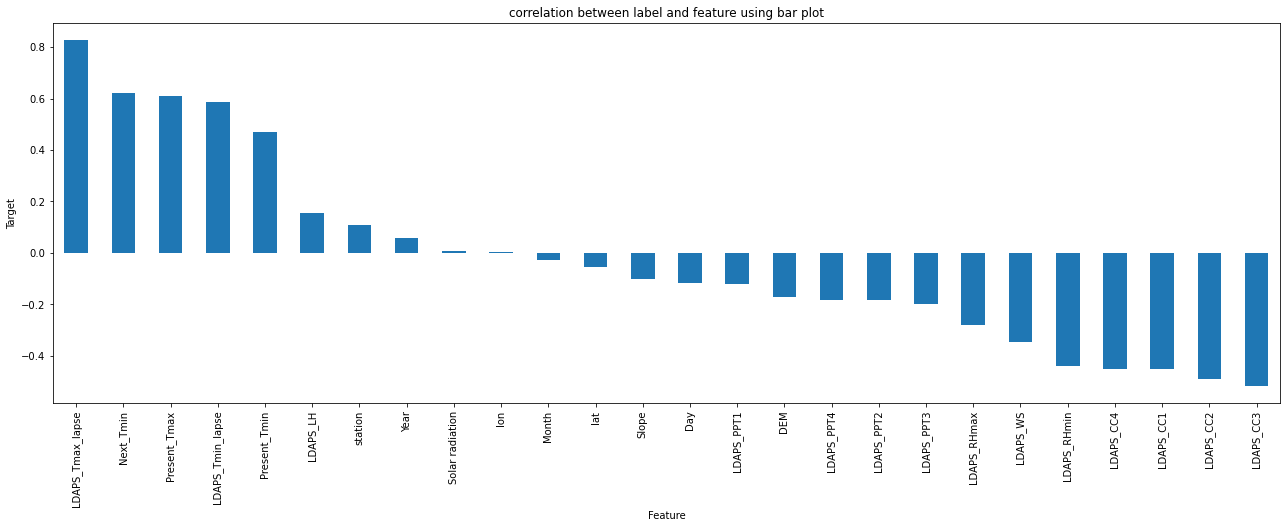

In [41]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot')
plt.show()

## Next_Tmin

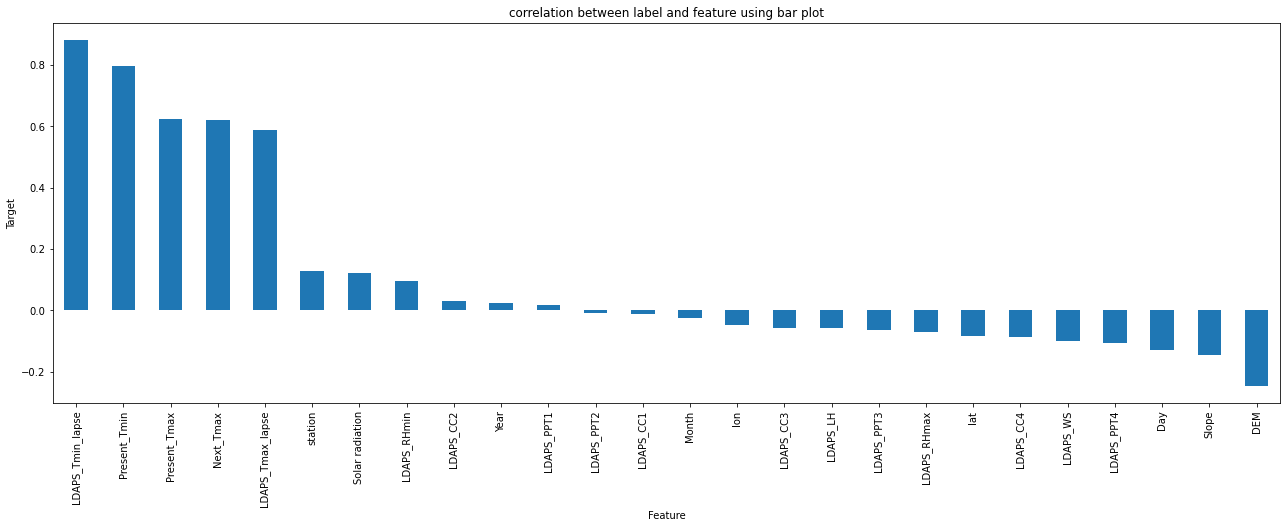

In [42]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot')
plt.show()

In [43]:
# lets separate features and target into x and y
X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y_max = df["Next_Tmax"]
y_min = df["Next_Tmin"]

* Here we have successfully seperated features and target column.

# **Skewness :**

In [44]:
# lets check for skewness in new dataframe
X.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Day                 0.245283
Month              -0.705586
Year               -0.000365
dtype: float64

* Skewness optimum level is +/-0.50.
Here there are few columns more than optimum limit so they are skewed.
* LDAPS_RHmax, LDAPS_CC1,LDAPS_CC3, LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
Month are skewed

In [45]:
# Lets remove skewness using yeo-johnson method
# Importing required library
from sklearn.preprocessing import PowerTransformer

# lets make a list of columns with skewness
skew=['LDAPS_RHmax','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# lets execute
scaler = PowerTransformer (method='yeo-johnson')


In [46]:
X[skew]=scaler.fit_transform(X[skew].values)
X[skew].head()

,LDAPS_RHmax,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Month
0,0.269762,-0.538372,-0.580369,-0.557339,-0.519114,-0.492283,-0.444377,1.834978,1.314153,1.849430,-0.582534
1,0.182577,-0.550844,-0.599240,-0.557339,-0.519114,-0.492283,-0.444377,0.055979,-0.385336,1.400702,-0.582534
2,-0.776602,-0.313480,-0.515420,-0.557339,-0.519114,-0.492283,-0.444377,-0.364575,-0.949164,1.380650,-0.582534
3,1.315999,-0.541353,-0.560937,-0.557339,-0.519114,-0.492283,-0.444377,0.084879,1.235263,1.357783,-0.582534
4,0.107639,-0.444948,-0.360509,-0.557339,-0.519114,-0.492283,-0.444377,-0.290442,-0.401730,1.366748,-0.582534


In [47]:
# Lets check the skewness again
X.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Day                 0.245283
Month               0.043780
Year               -0.000365
dtype: float64

* Tried removing the skewness but its not removing completely

# **Scaling:**

In [48]:
# Lets scale the data using minmaxscaler
# importing all required libraries
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(X),columns= X.columns)
X.sample(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
1885,0.416667,0.545455,0.688172,0.291574,0.459560,0.608931,0.596063,0.248481,0.324250,0.351969,0.134528,0.000624,0.000000,0.0,0.000000,0.000000,0.000000,0.429025,0.838188,0.365913,0.399061,0.772246,0.250000,0.437757,0.25
1390,0.625000,0.664773,0.505376,0.275214,0.273611,0.655735,0.557348,0.112257,0.496531,0.188393,0.022234,0.061283,0.152678,0.0,0.000000,0.000000,0.000000,0.071504,0.546926,0.738127,0.810963,0.106290,0.708333,0.537778,0.00
4905,0.208333,0.789773,0.704301,0.345245,0.303528,0.716214,0.746944,0.163444,0.324371,0.317819,0.185252,0.665879,0.877914,0.0,0.000000,0.000000,0.819376,0.286017,0.699029,0.604369,0.051153,0.800457,0.000000,0.756987,0.75
1484,0.375000,0.528409,0.516129,0.520175,0.764234,0.448570,0.586109,0.456468,0.301679,0.285059,0.528804,0.867014,0.479232,0.0,0.542495,0.997930,0.000000,0.000000,0.417476,0.995545,0.999999,0.039256,0.875000,0.537778,0.00
5773,0.958333,0.869318,0.892473,0.722122,0.510869,0.583971,0.861122,0.102714,0.254675,0.354970,0.687124,0.905631,0.493509,0.0,0.000000,0.998902,0.064641,0.357521,0.268608,0.153008,0.125586,0.273957,0.250000,0.537778,0.75


* Here we have successfully scaled the data using MinMaxScaler method to overcome the issue of data biasness.

# **VIF(Variance Inflation Factor):**

In [49]:
# importing all required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Lets find varience inflation factor in each scaled column i.e x.shape[1] (1/(1-R2))
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,4.462994,station
1,33.634823,Present_Tmax
2,78.082261,Present_Tmin
3,44.537305,LDAPS_RHmin
4,18.351022,LDAPS_RHmax
5,85.783552,LDAPS_Tmax_lapse
6,104.449001,LDAPS_Tmin_lapse
7,6.056268,LDAPS_WS
8,9.176352,LDAPS_LH
9,15.049255,LDAPS_CC1


In [51]:
# lets drop the columns
X.drop(["LDAPS_Tmin_lapse","LDAPS_Tmax_lapse"],axis=1, inplace=True)

In [52]:
# Lets check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,4.304877,station
1,29.341383,Present_Tmax
2,48.679953,Present_Tmin
3,30.659327,LDAPS_RHmin
4,17.666259,LDAPS_RHmax
5,5.920432,LDAPS_WS
6,8.366327,LDAPS_LH
7,14.840945,LDAPS_CC1
8,17.715734,LDAPS_CC2
9,17.694594,LDAPS_CC3


* Here we have successfully removed the column but still problem persist, lets remove LDAPS_RHmin to see whether it can help or not.

In [53]:
X.drop(["Present_Tmin","LDAPS_RHmin","Present_Tmax"],axis=1,inplace=True)

In [54]:
# lets check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,3.787871,station
1,12.678970,LDAPS_RHmax
2,5.722449,LDAPS_WS
3,7.113876,LDAPS_LH
4,13.531236,LDAPS_CC1
5,16.260404,LDAPS_CC2
6,15.720659,LDAPS_CC3
7,9.632878,LDAPS_CC4
8,3.278906,LDAPS_PPT1
9,2.943201,LDAPS_PPT2


* Still few columns are having values over 10, lets remove Present_Tmin and lets see what happens

In [55]:
X.drop(["LDAPS_CC3","LDAPS_CC2","DEM"],axis=1,inplace=True)

In [56]:
# lets check VIF value once again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,3.476255,station
1,12.061776,LDAPS_RHmax
2,5.523021,LDAPS_WS
3,6.747235,LDAPS_LH
4,8.560232,LDAPS_CC1
5,5.114352,LDAPS_CC4
6,2.959442,LDAPS_PPT1
7,2.344798,LDAPS_PPT2
8,1.978887,LDAPS_PPT3
9,2.036493,LDAPS_PPT4


Still values in few columns are more than 10, Lets remove LDAPS_CC3 as it is having maximum value above 10 right now.

In [57]:
# lets remove LDAPS_CC3
X.drop("LDAPS_RHmax",axis=1,inplace =True)

In [58]:
# lets check the VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,3.475719,station
1,5.513228,LDAPS_WS
2,5.631774,LDAPS_LH
3,7.951482,LDAPS_CC1
4,5.114307,LDAPS_CC4
5,2.938783,LDAPS_PPT1
6,2.300667,LDAPS_PPT2
7,1.968869,LDAPS_PPT3
8,2.036438,LDAPS_PPT4
9,4.648403,lat


* Now finally we have got all the VIF values under the limit of 10.

In [59]:
# lets check dataset after VIF
X.head()

,station,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Slope,Solar radiation,Day,Month,Year
0,0.000000,0.207447,0.365853,0.241862,0.267354,0.0,0.0,0.0,0.0,0.786017,0.533981,0.867054,1.000000,0.958333,0.344567,0.0
1,0.041667,0.148053,0.288703,0.233137,0.261756,0.0,0.0,0.0,0.0,0.786017,0.666667,0.339168,0.879907,0.958333,0.344567,0.0
2,0.083333,0.171575,0.150545,0.216426,0.286617,0.0,0.0,0.0,0.0,0.643008,0.750809,0.164035,0.874540,0.958333,0.344567,0.0
3,0.125000,0.145848,0.349446,0.223692,0.273117,0.0,0.0,0.0,0.0,1.000000,0.634304,0.842549,0.868420,0.958333,0.344567,0.0
4,0.166667,0.150325,0.535505,0.156529,0.332562,0.0,0.0,0.0,0.0,0.500530,1.000000,0.334076,0.870820,0.958333,0.344567,0.0


# **Model Building:**

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y_max,test_size=0.2, random_state=109)
x_train,x_test,y_train,y_test = train_test_split(X,y_min,test_size=0.2, random_state=109)

In [89]:
# Lets import all required libraries
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from xgboost import XGBRegressor as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Random Forest Regressor

In [62]:
rf_max=RandomForestRegressor()
rf_min=RandomForestRegressor()
rf_max.fit(X_train,Y_train)
rf_min.fit(x_train,y_train)

pred_max_rf=rf_max.predict(X_test)
acc_max_rf=r2_score(Y_test,pred_max_rf)

pred_min_rf=rf_min.predict(x_test)
acc_min_rf=r2_score(y_test,pred_min_rf)


print("Best Accuracy for Next_Tmax : ", acc_max_rf)
print("Best Accuracy for Next_Tmin : ", acc_min_rf)

Best Accuracy for Next_Tmax :  0.8935254121945018
Best Accuracy for Next_Tmin :  0.903506762420934


## BaggingRegressor

In [63]:
bg_max=RandomForestRegressor()
bg_min=RandomForestRegressor()
bg_max.fit(X_train,Y_train)
bg_min.fit(x_train,y_train)

pred_max_bg=bg_max.predict(X_test)
acc_max_bg=r2_score(Y_test,pred_max_bg)

pred_min_bg=bg_min.predict(x_test)
acc_min_bg=r2_score(y_test,pred_min_bg)


print("Best Accuracy for Next_Tmax : ", acc_max_bg)
print("Best Accuracy for Next_Tmin : ", acc_min_bg)

Best Accuracy for Next_Tmax :  0.8955488624587744
Best Accuracy for Next_Tmin :  0.9027116637868514


## GradientBoostingRegressor

In [64]:
gb_max=RandomForestRegressor()
gb_min=RandomForestRegressor()
gb_max.fit(X_train,Y_train)
gb_min.fit(x_train,y_train)

pred_max_gb=gb_max.predict(X_test)
acc_max_gb=r2_score(Y_test,pred_max_gb)

pred_min_gb=gb_min.predict(x_test)
acc_min_gb=r2_score(y_test,pred_min_gb)


print("Best Accuracy for Next_Tmax : ", acc_max_gb)
print("Best Accuracy for Next_Tmin : ", acc_min_gb)

Best Accuracy for Next_Tmax :  0.8945547955065796
Best Accuracy for Next_Tmin :  0.9048923468463707


## ExtraTreesRegressor

In [65]:
et_max=RandomForestRegressor()
et_min=RandomForestRegressor()
et_max.fit(X_train,Y_train)
et_min.fit(x_train,y_train)

pred_max_et=et_max.predict(X_test)
acc_max_et=r2_score(Y_test,pred_max_et)

pred_min_et=et_min.predict(x_test)
acc_min_et=r2_score(y_test,pred_min_et)


print("Best Accuracy for Next_Tmax : ", acc_max_et)
print("Best Accuracy for Next_Tmin : ", acc_min_et)

Best Accuracy for Next_Tmax :  0.8942530747067463
Best Accuracy for Next_Tmin :  0.9040476720910822


## DecisionTreeRegressor

In [66]:
dt_max=RandomForestRegressor()
dt_min=RandomForestRegressor()
dt_max.fit(X_train,Y_train)
dt_min.fit(x_train,y_train)

pred_max_dt=et_max.predict(X_test)
acc_max_dt=r2_score(Y_test,pred_max_dt)

pred_min_dt=et_min.predict(x_test)
acc_min_dt=r2_score(y_test,pred_min_dt)


print("Best Accuracy for Next_Tmax : ", acc_max_dt)
print("Best Accuracy for Next_Tmin : ", acc_min_dt)

Best Accuracy for Next_Tmax :  0.8942530747067463
Best Accuracy for Next_Tmin :  0.9040476720910822


## KNeighborsRegressor 

In [67]:
knn_max=KNN()
knn_min=KNN()
knn_max.fit(X_train,Y_train)
knn_min.fit(x_train,y_train)

pred_max_knn=et_max.predict(X_test)
acc_max_knn=r2_score(Y_test,pred_max_knn)

pred_min_knn=et_min.predict(x_test)
acc_min_knn=r2_score(y_test,pred_min_knn)


print("Best Accuracy for Next_Tmax : ", acc_max_knn)
print("Best Accuracy for Next_Tmin : ", acc_min_knn)

Best Accuracy for Next_Tmax :  0.8942530747067463
Best Accuracy for Next_Tmin :  0.9040476720910822


## XGB Regressor

In [68]:
xgb_max=xgb()
xgb_min=xgb()
xgb_max.fit(X_train,Y_train)
xgb_min.fit(x_train,y_train)

pred_max_xgb=et_max.predict(X_test)
acc_max_xgb=r2_score(Y_test,pred_max_xgb)

pred_min_xgb=et_min.predict(x_test)
acc_min_xgb=r2_score(y_test,pred_min_xgb)


print("Best Accuracy for Next_Tmax : ", acc_max_xgb)
print("Best Accuracy for Next_Tmin : ", acc_min_xgb)

Best Accuracy for Next_Tmax :  0.8942530747067463
Best Accuracy for Next_Tmin :  0.9040476720910822


In [69]:
df2=pd.DataFrame({'Models':["Random Forest Regressor",
                            "BaggingRegressor",
                            "GradientBoostingRegressor",
                            "ExtraTreesRegressor",
                            "DecisionTreeRegressor",
                            "KNeighborsRegressor",
                            "XGB Regressor"],
                 'Best Accuracy for Next_Tmax':[acc_max_rf,acc_max_bg,acc_max_gb,acc_max_et,acc_max_dt,acc_max_knn,acc_max_xgb],
                 'Best Accuracy for Next_Tmin':[acc_min_rf,acc_min_bg,acc_min_gb,acc_min_et,acc_min_dt,acc_min_knn,acc_min_xgb]})
df2

,Models,Best Accuracy for Next_Tmax,Best Accuracy for Next_Tmin
0,Random Forest Regressor,0.893525,0.903507
1,BaggingRegressor,0.895549,0.902712
2,GradientBoostingRegressor,0.894555,0.904892
3,ExtraTreesRegressor,0.894253,0.904048
4,DecisionTreeRegressor,0.894253,0.904048
5,KNeighborsRegressor,0.894253,0.904048
6,XGB Regressor,0.894253,0.904048


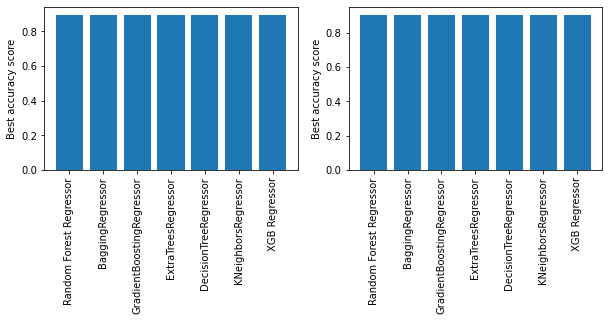

In [70]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(x=df2.Models, height=df2['Best Accuracy for Next_Tmax'])
plt.xticks(rotation=90)
plt.ylabel('Best accuracy score')

plt.subplot(1,2,2)
plt.bar(x=df2.Models, height=df2['Best Accuracy for Next_Tmin'])
plt.xticks(rotation=90)
plt.ylabel('Best accuracy score')
plt.show()

# Cross Validation Scores

In [71]:
# Importing required library
from sklearn.model_selection import cross_val_score

In [72]:
# lets check cv score of RFR
print("Cross Validation score for Next_Tmax",cross_val_score(rf_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(rf_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.07326467303856585
Cross Validation score for Next_Tmin -0.24162653194118638


In [73]:
# lets check cv score of BGR
print("Cross Validation score for Next_Tmax",cross_val_score(bg_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(bg_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.0709405042570627
Cross Validation score for Next_Tmin -0.22410190010273542


In [74]:
# lets check cv score of GBR
print("Cross Validation score for Next_Tmax",cross_val_score(gb_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(gb_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.055472887377955415
Cross Validation score for Next_Tmin -0.2206574388680996


In [75]:
# lets check cv score of ETR
print("Cross Validation score for Next_Tmax",cross_val_score(et_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(et_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.061673843478627456
Cross Validation score for Next_Tmin -0.21131388196058168


In [76]:
# lets check cv score of DTR
print("Cross Validation score for Next_Tmax",cross_val_score(dt_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(dt_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.06885340167390423
Cross Validation score for Next_Tmin -0.20739404524683422


In [77]:
# lets check cv score of knn
print("Cross Validation score for Next_Tmax",cross_val_score(knn_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(knn_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax -0.014766949260193462
Cross Validation score for Next_Tmin -0.25336473160386214


In [78]:
# lets check cv score of xgb
print("Cross Validation score for Next_Tmax",cross_val_score(xgb_max,X,y_max,cv=5).mean())
print("Cross Validation score for Next_Tmin",cross_val_score(xgb_min,X,y_min,cv=5).mean())

Cross Validation score for Next_Tmax 0.17829882909766603
Cross Validation score for Next_Tmin -0.10811965848596627


# Hyper Parameter Tuning

In [79]:
# Lets import all required libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor as xgb
from sklearn.ensemble import RandomForestRegressor as rf

In [80]:
# Lets find parameters for our best model

parameters= {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

parameter = {'n_estimators' : [50,100,150,200],
             "max_depth": [4, 6, 8, 10],
             "max_features": [1,2,3,4],
             }

In [81]:
gcv_Next_Tmax=GridSearchCV(xgb(),parameters,cv=5)
gcv_Next_Tmin=GridSearchCV(rf(),parameter,cv=5)

In [82]:
gcv_Next_Tmax.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [83]:
gcv_Next_Tmin.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

In [84]:
gcv_Next_Tmax.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

In [85]:
gcv_Next_Tmin.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 50}

#### 1. Next Tmax

R2_score:  0.7682420138684837
RMSE value:  {1.2137255148549142}
MAE:  {0.9173893562781726}
MSE:  {1.4731296254098263}


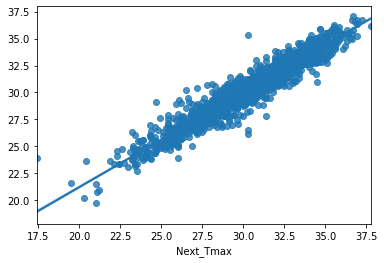

In [99]:
model1=xgb(gamma=0.1 , learning_rate=0.1 , max_depth=8 , n_estimators= 200)
model1.fit(X_train,Y_train)
pred_max= model1.predict(X_test)
print('R2_score: ', r2_score(y_test,pred_min))
print("RMSE value: ",{np.sqrt(mean_squared_error(y_test,pred_min))})
print("MAE: ",{mean_absolute_error(y_test,pred_min)})
print("MSE: ",{(mean_squared_error(y_test,pred_min))})

# Lets visualize the predicted value using regplot
sns.regplot(Y_test,pred_max)
plt.show()

#### 2. Next Tmin

R2_score:  0.7682420138684837
RMSE value:  {1.2137255148549142}
MAE:  {0.9173893562781726}
MSE:  {1.4731296254098263}


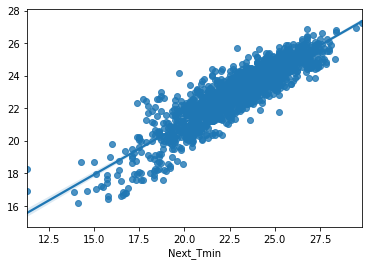

In [98]:
model2=rf(max_depth= 10, max_features=4, n_estimators=50)
model2.fit(x_train,y_train)
pred_min= model2.predict(x_test)
print('R2_score: ', r2_score(y_test,pred_min))
print("RMSE value: ",{np.sqrt(mean_squared_error(y_test,pred_min))})
print("MAE: ",{mean_absolute_error(y_test,pred_min)})
print("MSE: ",{(mean_squared_error(y_test,pred_min))})

# Lets visualize the predicted value using regplot
sns.regplot(y_test,pred_min)
plt.show()

# Model Saving

In [100]:
# saving the model using .pkl
import joblib
joblib.dump(model1,"Temperature_forecast Next Day Maximum Temperature.pkl")
joblib.dump(model2,"Temperature_forecast Next Day Minimum Temperature.pkl")

['Temperature_forecast Next Day Minimum Temperature.pkl']

# Loading Model and Predicting

In [101]:
# Loading the saved model
model1=joblib.load("Temperature_forecast Next Day Maximum Temperature.pkl")
model2=joblib.load("Temperature_forecast Next Day Minimum Temperature.pkl")

# Prediction

In [102]:
predict_Tmax=model1.predict(X_test)
predict_Tmax

array([31.399637, 29.032976, 31.517603, ..., 30.40841 , 32.836082,
       30.704657], dtype=float32)

In [103]:
predict_Tmin=model2.predict(x_test)
predict_Tmin

array([23.1286413 , 23.5475617 , 25.03072557, ..., 25.27098067,
       23.52619338, 22.46918436])